# **Projet réalisé par :**


1.  **Mariam DIAKITE**
2.   **Maty Laye SOUARE**


In [ ]:
!pip install tensorflow

In [ ]:

import os
import tensorflow as tf
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# drive.mount('/content/gdrive')

# #répertoire pour les données de surveillance
# repertoire_donnees_monitoring = '/content/gdrive/My Drive/Projet_Image/Data_colorectal_histology'
# os.makedirs(repertoire_donnees_monitoring, exist_ok=True)

# # répertoire pour votre modèle
# repertoire_modele = '/content/gdrive/My Drive/Projet_Image/modele'
# os.makedirs(repertoire_modele, exist_ok=True)


Mounted at /content/gdrive


#Importation des données



In [ ]:
dataset = tfds.load('colorectal_histology', split='train', shuffle_files=True)



In [ ]:
def import_Y_X(dataset):
  X = []
  y = []

  for data in dataset:
      image_data = data['image']
      label = data['label']

      X.append(image_data)
      y.append(label)

  X_train_np = np.array(X)
  y_train_np = np.array(y)

  return X_train_np,y_train_np

images,labels=import_Y_X(dataset)
print("shape Images: ",images.shape)
print("shape Labels: ",labels.shape)

shape Images:  (5000, 150, 150, 3)
shape Labels:  (5000,)


#Compréhension des données


In [ ]:
#Nombre d 'echantillons par classes
unique_values, counts = np.unique(labels, return_counts=True)
for c, count in zip(labels, counts):
    print(f"Classe {c}: {count} échantillons")

Classe 6: 625 échantillons
Classe 4: 625 échantillons
Classe 7: 625 échantillons
Classe 2: 625 échantillons
Classe 6: 625 échantillons
Classe 2: 625 échantillons
Classe 3: 625 échantillons
Classe 4: 625 échantillons


# Quelque  Images

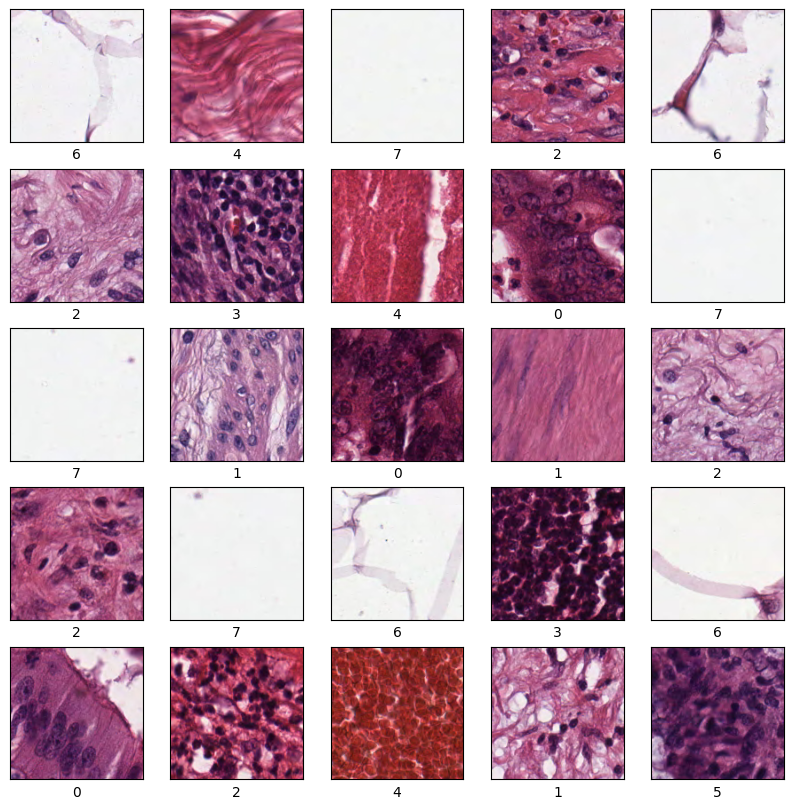

In [ ]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(class_names[labels[i]])
plt.show()


# Prétraitement des données

## Normalistion et division des données

In [ ]:
#Normalisation des données
images=images/ 255.0


#Division des données en test, train et val

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True)


In [ ]:


from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#l'augmentation à chaque image dans X_train
datagen.fit(X_train)


# Modèle CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entraînement du modèle en utilisant le générateur d'images augmentées
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/100
89/89 [==============================] - 26s 215ms/step - loss: 1.3019 - accuracy: 0.4257 - val_loss: 1.1887 - val_accuracy: 0.4712
Epoch 2/100
89/89 [==============================] - 18s 199ms/step - loss: 0.8888 - accuracy: 0.6101 - val_loss: 0.9819 - val_accuracy: 0.5408
Epoch 3/100
89/89 [==============================] - 19s 217ms/step - loss: 0.8360 - accuracy: 0.6533 - val_loss: 1.1086 - val_accuracy: 0.5050
Epoch 4/100
89/89 [==============================] - 18s 200ms/step - loss: 0.7695 - accuracy: 0.6860 - val_loss: 0.8229 - val_accuracy: 0.6640
Epoch 5/100
89/89 [==============================] - 18s 197ms/step - loss: 0.7403 - accuracy: 0.6916 - val_loss: 0.6276 - val_accuracy: 0.8091
Epoch 6/100
89/89 [==============================] - 18s 199ms/step - loss: 0.6431 - accuracy: 0.7482 - val_loss: 0.6230 - val_accuracy: 0.7614
Epoch 7/100
89/89 [==============================] - 18s 197ms/step - loss: 0.6005 - accuracy: 0.7763 - val_loss: 0.7467 - val_accuracy:

#Evaluation Modèle

In [ ]:


test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

52/52 - 1s - loss: 0.4816 - accuracy: 0.8267 - 759ms/epoch - 15ms/step


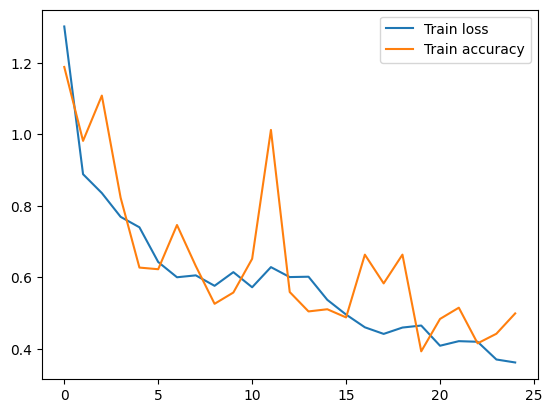

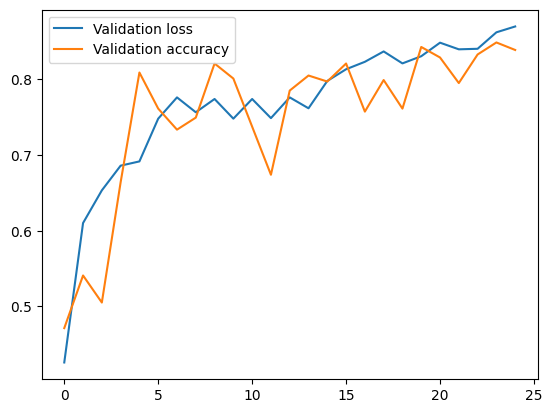

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

training_loss = history.history['loss']
training_acc  = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc  = history.history['val_accuracy']


plt.plot(training_loss, label="Train loss")
plt.plot(val_loss,  label="Train accuracy")
plt.legend()
plt.show()

plt.plot(training_acc, label="Validation loss")
plt.plot(val_acc,  label="Validation accuracy")
plt.legend()
plt.show()

52/52 [==============================] - 0s 9ms/step


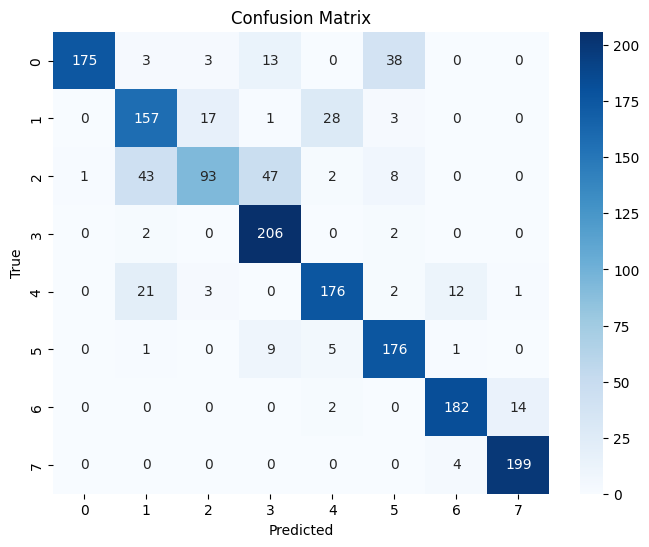

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.86       232
           1       0.69      0.76      0.73       206
           2       0.80      0.48      0.60       194
           3       0.75      0.98      0.85       210
           4       0.83      0.82      0.82       215
           5       0.77      0.92      0.84       192
           6       0.91      0.92      0.92       198
           7       0.93      0.98      0.95       203

    accuracy                           0.83      1650
   macro avg       0.83      0.83      0.82      1650
weighted avg       0.84      0.83      0.82      1650



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Prédiction des classes sur l'ensemble de validation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Affichage de la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_names = ["0", "1", "2", "3", "4", "5", "6", "7"]
class_report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)
